#**LAB 12**
#**ROLL NO : J078**

**EXPERIMENT 12**
Aim: Time series analysis of UCI Time series data using machine learning models

Objectives:
1. Download from Repository data
2. Perform Time series analysis on given dataset
3. Select correct architecture for single step multi-output and multi-step prediction
4. List hyper-parameters used 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
dfc = pd.read_csv("/content/AirQualityUCI.csv")
dfc.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [5]:
dfc.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [6]:
dfc.shape

(9357, 15)

In [7]:
dfc.replace(to_replace = -200,value = np.NaN , inplace = True )

In [8]:
num = dfc.isnull().sum()
percent = num/dfc.shape[0]*100
percent

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [9]:
dfc['DateTime'] = dfc['Date']+ ' ' + dfc['Time']
dfc.drop(['Time'], axis=1, inplace=True)
dfc['DateTime'] = pd.to_datetime(dfc['DateTime'].astype(str), format='%d-%m-%Y %H:%M:%S')
dfc['Date'] = pd.to_datetime(dfc['Date'].astype(str), format='%d-%m-%Y')
dfc.shape

(9357, 15)

In [10]:
dfc.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2004-03-10,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2004-03-10,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2004-03-10,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2004-03-10,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,2004-03-10,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [11]:
num = dfc.isnull().sum()
percent = num/dfc.shape[0]*100
percent

Date              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
DateTime          0.000000
dtype: float64

In [12]:
dfc.drop(['NMHC(GT)'], axis= 1, inplace= True)
num = dfc.isnull().sum()
percent = num/dfc.shape[0]*100
percent

Date              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
DateTime          0.000000
dtype: float64

In [13]:
num

Date                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
dtype: int64

In [14]:
dfc["T"] = dfc.groupby("Date")["T"].transform(lambda x: x.fillna(x.mean()))
dfc["CO(GT)"] = dfc.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
dfc["NOx(GT)"] = dfc.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
dfc["NO2(GT)"] = dfc.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

In [15]:
num = dfc.isnull().sum()
percent = num/dfc.shape[0]*100
percent

Date             0.000000
CO(GT)           9.233729
PT08.S1(CO)      3.911510
C6H6(GT)         3.911510
PT08.S2(NMHC)    3.911510
NOx(GT)          8.720744
PT08.S3(NOx)     3.911510
NO2(GT)          8.720744
PT08.S4(NO2)     3.911510
PT08.S5(O3)      3.911510
T                2.051940
RH               3.911510
AH               3.911510
DateTime         0.000000
dtype: float64

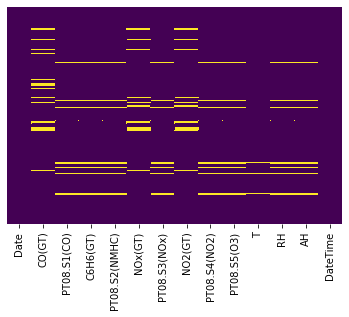

In [16]:
sns.heatmap(dfc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
dfc.fillna(method='ffill', inplace= True)

In [18]:
num = dfc.isnull().sum()
percent = num/dfc.shape[0]*100
percent

Date             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
DateTime         0.0
dtype: float64

In [19]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   float64       
 5   NOx(GT)        9357 non-null   float64       
 6   PT08.S3(NOx)   9357 non-null   float64       
 7   NO2(GT)        9357 non-null   float64       
 8   PT08.S4(NO2)   9357 non-null   float64       
 9   PT08.S5(O3)    9357 non-null   float64       
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(12)
memory usage: 1023.5 KB


In [20]:
dfc.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082589,1102.730362,10.190392,942.548253,239.419651,832.742225,109.382418,1453.014535,1030.511916,18.167474,48.817431,1.017382
std,1.383347,219.588101,7.565771,269.581368,200.833596,255.709423,46.058214,347.434084,410.916759,8.833685,17.354326,0.404829
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,938.000000,4.400000,733.000000,102.000000,655.000000,76.000000,1228.000000,726.000000,11.500000,35.400000,0.726200
50%,1.700000,1062.000000,8.300000,911.000000,177.000000,807.000000,103.608696,1460.000000,964.000000,17.600000,48.900000,0.987500
75%,2.700000,1237.000000,14.000000,1117.000000,316.000000,968.000000,135.000000,1677.000000,1287.000000,24.300000,61.900000,1.306700
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4007f1e828>,
      dtype=object)

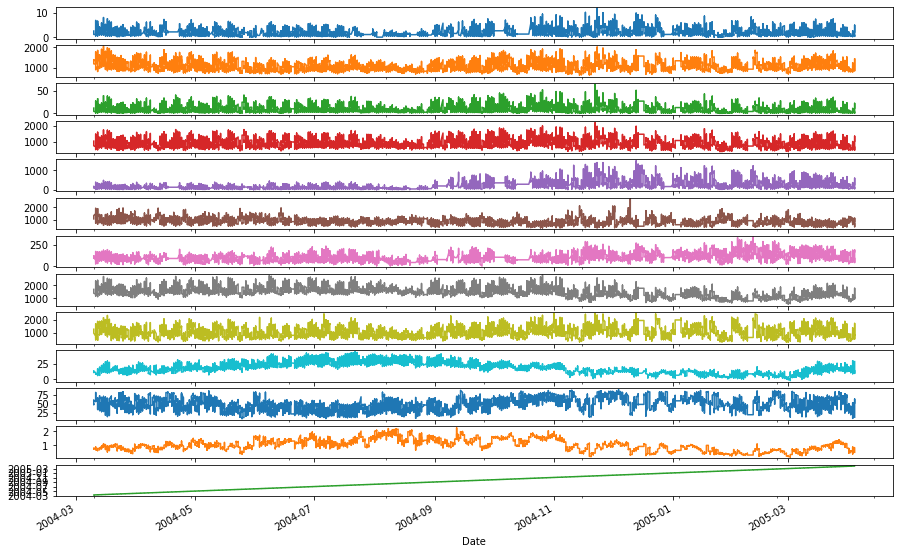

In [21]:
dfc.plot(x='Date',subplots=True, figsize=(15, 10),legend=False)

<Figure size 432x288 with 0 Axes>

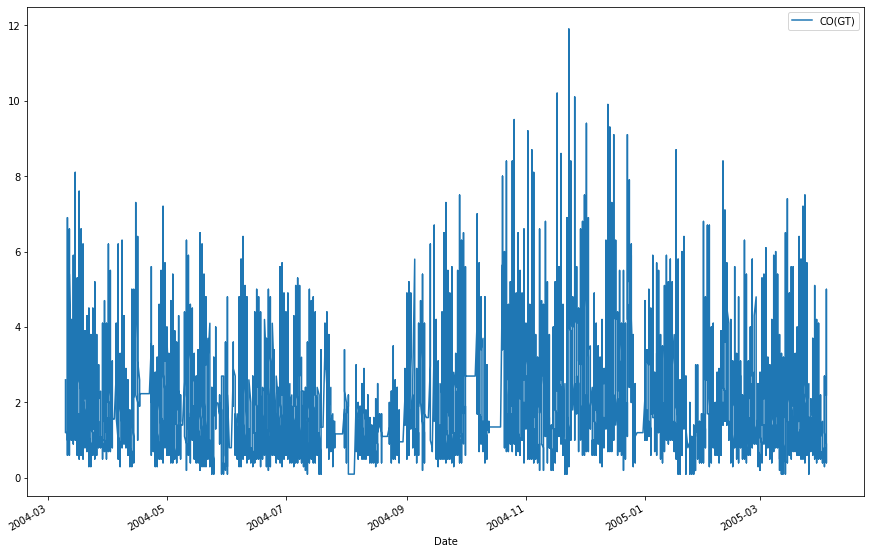

In [22]:
plt.figure(); dfc.plot(x='Date',y='CO(GT)',figsize=(15, 10)); plt.legend(loc='best')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


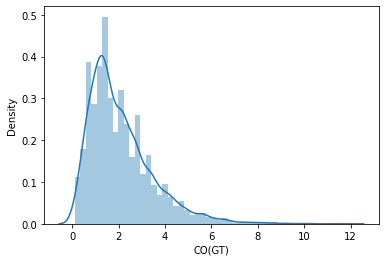

In [23]:
sns.distplot(dfc["CO(GT)"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


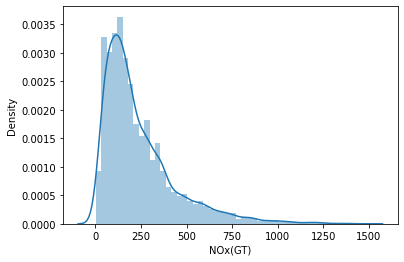

In [24]:
sns.distplot(dfc["NOx(GT)"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


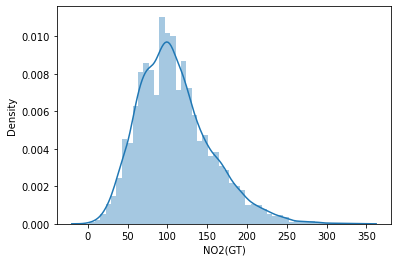

In [25]:
sns.distplot(dfc["NO2(GT)"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


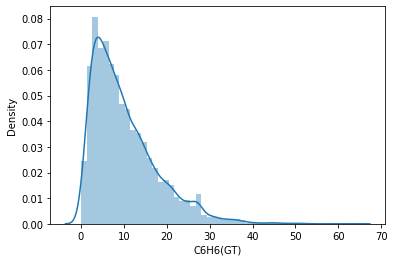

In [26]:
sns.distplot(dfc["C6H6(GT)"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


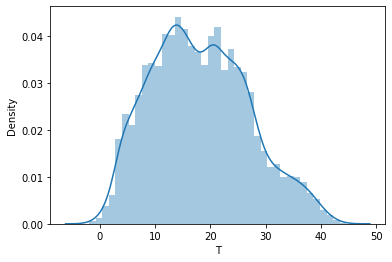

In [27]:
sns.distplot(dfc["T"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


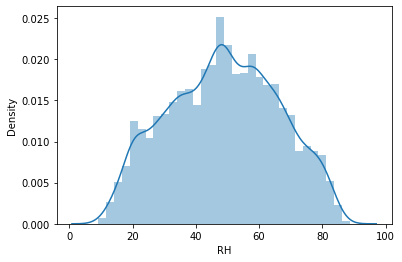

In [28]:
sns.distplot(dfc["RH"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


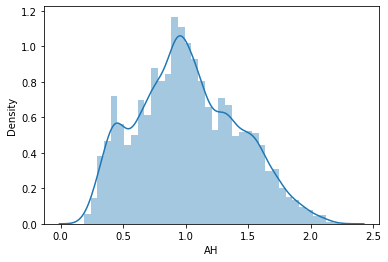

In [29]:

sns.distplot(dfc["AH"])

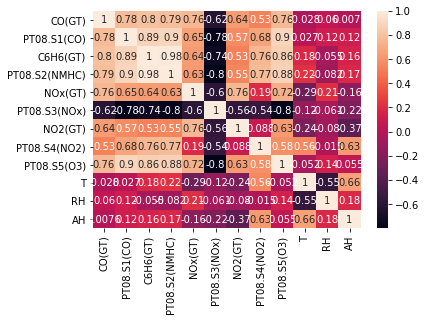

In [30]:
sns.heatmap(dfc.corr(), annot=True)

In [31]:
dfc.head()

,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2004-03-10,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2004-03-10,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2004-03-10,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2004-03-10,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,2004-03-10,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [32]:
X = dfc[['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)'	,'PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']]

In [33]:
Y = dfc[['AH']]

In [34]:
X.shape

(9357, 11)

In [35]:
Y.shape

(9357, 1)

In [36]:
dfc.shape

(9357, 14)

In [37]:
n = len(dfc)
x_train_df = X[0:int(n*0.8)]
x_test_df = X[int(n*0.8):]
y_train_df = Y[0:int(n*0.8)]
y_test_df = Y[int(n*0.8):]

In [38]:
print(x_train_df.shape,y_train_df.shape,x_test_df.shape,y_test_df.shape)

(7485, 11) (7485, 1) (1872, 11) (1872, 1)


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train_df)
x_train = scaler.fit_transform(x_train_df)
scaler.fit(x_test_df)
x_test = scaler.fit_transform(x_test_df)
scaler.fit(y_train_df)
y_train = scaler.fit_transform(y_train_df)
scaler.fit(y_test_df)
y_test = scaler.fit_transform(y_test_df)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(7485, 11, 1)
(1872, 11, 1)
(7485, 1)
(1872, 1)


In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
def RNN_MODEL():
    # have to convert to 3D for feeding the data
    regressor = Sequential()
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['accuracy'])
    return regressor
regressor = RNN_MODEL()
regressor.fit(x_train,y_train,epochs = 100)

Epoch 1/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0404 - accuracy: 1.3360e-04
Epoch 2/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0291 - accuracy: 1.3360e-04
Epoch 3/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0106 - accuracy: 2.6720e-04
Epoch 4/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0088 - accuracy: 2.6720e-04
Epoch 5/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0077 - accuracy: 2.6720e-04
Epoch 6/100
234/234 [==============================] - 2s 8ms/step - loss: 0.0076 - accuracy: 2.6720e-04
Epoch 7/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0068 - accuracy: 2.6720e-04
Epoch 8/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0067 - accuracy: 2.6720e-04
Epoch 9/100
234/234 [==============================] - 2s 7ms/step - loss: 0.0060 - accuracy: 2.6720e-04
Epoch 10/100
234/234 [==============================] -

In [41]:
regressor.evaluate(x_test,y_test)
y_pred = regressor.predict(x_test)
output = scaler.inverse_transform(y_pred)
real_output = []
for item in output:
    real_output.append((item[0]))

59/59 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.0011


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


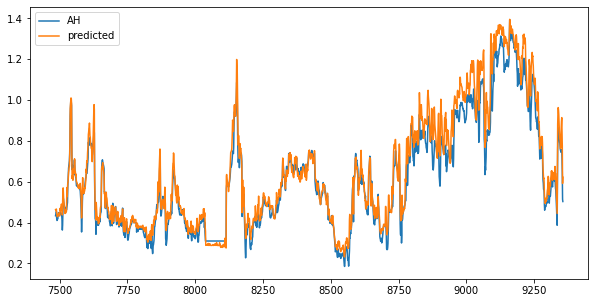

In [42]:
value = y_test_df
value['predicted'] = np.array(real_output)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
value.plot()